<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithms & Data Structures

This class, *Algorithms & Data Structures*, introduces the most important computer science topics for machine learning, enabling you to design and deploy computationally efficient data models. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of all of the essential data structures across the list, dictionary, tree, and graph families. You’ll also learn the key algorithms for working with these structures, including those for searching, sorting, hashing, and traversing data. 

The content covered in this class is itself foundational for the *Optimization* class of the *Machine Learning Foundations* series.

Over the course of studying this topic, you'll: 

* Use “Big O” notation to characterize the time efficiency and space efficiency of a given algorithm, enabling you to select or devise the most sensible approach for tackling a particular machine learning problem with the hardware resources available to you.
* Get acquainted with the entire range of the most widely-used Python data structures, including list-, dictionary-, tree-, and graph-based structures. 
* Develop an understanding of all of the essential algorithms for working with data, including those for searching, sorting, hashing, and traversing. 


**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Introduction to Data Structures and Algorithms*
* A Brief History of Data and Data Structures
* A Brief History of Algorithms
* “Big O” Notation for Time and Space Complexity 
 
*Segment 2: Lists and Dictionaries*
* List-Based Data Structures: Arrays, Linked Lists, Stacks, Queues, and Deques 
* Searching and Sorting: Binary, Bubble, Merge, and Quick
* Dictionaries: Sets and Maps
* Hashing: Hash Tables and Hash Maps

*Segment 3: Trees and Graphs*
* Trees: Binary Search, Heaps, and Self-Balancing
* Graphs: Terminology, Coded Representations, Properties, Traversals, and Paths
* Resources for Further Study of Data Structures & Algorithms


# Segment 1: Intro to Data Structures & Algorithms

### "Big O" Notation

In [150]:
import numpy as np
import tensorflow as tf
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time # for timing processes
import random # for generating random values

#### Constant Time

In [2]:
def take_first(my_list):
    return my_list[0]

In [3]:
short_list = [13, 25, 42]

In [4]:
tic = time.process_time() # if using a version of Python older than 3.3, you can use time.clock() here
first = take_first(short_list)
toc = time.process_time()

In [5]:
first

13

In [6]:
toc-tic

5.7146000000063424e-05

In [7]:
long_list = [42] * 10**8 # one hundred million items

In [8]:
len(long_list)

100000000

In [9]:
tic = time.process_time()
first = take_first(long_list)
toc = time.process_time()

In [10]:
toc-tic

5.756299999948311e-05

In [11]:
list_lengths = [10**l for l in range(1, 8)]
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [12]:
constant_times = []

for l in list_lengths:
    lst = [42]*l
  
    tic = time.process_time()
    x = take_first(lst)
    toc = time.process_time()
  
    constant_times.append(toc-tic)

In [13]:
import pandas as pd

In [14]:
constant_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['n', 'time'])
constant_df

,n,time
0,10,4.271000e-06
1,100,1.002000e-06
2,1000,9.050000e-07
3,10000,1.248000e-06
4,100000,2.607000e-06
5,1000000,4.830000e-06
6,10000000,8.038000e-06


#### Linear Time

In [15]:
def find_max(my_list):
    max_value = my_list[0]
    for i in range(len(my_list)):
        if my_list[i] > max_value:
            max_value = my_list[i]
    return max_value

In [16]:
tic = time.process_time()
largest = find_max(short_list)
toc = time.process_time()

In [17]:
toc-tic

7.889599999977293e-05

In [18]:
largest

42

In [19]:
tic = time.process_time()
largest = find_max(long_list)
toc = time.process_time()

In [20]:
toc-tic

4.259298254

In [21]:
largest

42

In [22]:
linear_times = []

for l in list_lengths:
    lst = [42]*l
  
    tic = time.process_time()
    x = find_max(lst)
    toc = time.process_time()
  
    linear_times.append(toc-tic)

In [23]:
linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['n', 'time'])
linear_df

,n,time
0,10,0.000011
1,100,0.000005
2,1000,0.000077
3,10000,0.000424
4,100000,0.004418
5,1000000,0.047088
6,10000000,0.421289


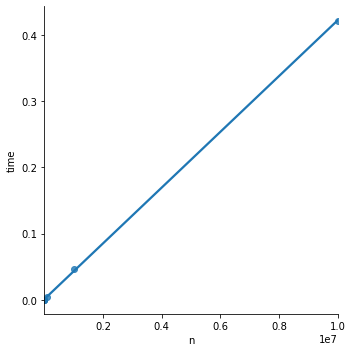

In [24]:
_ = sns.lmplot(x='n', y='time', data=linear_df, ci=None) # linear model (regression) plot

#### Polynomial Time

In [25]:
def element_multiplier(my_list): 
    for i in range(len(my_list)):
        for j in range(len(my_list)):
            x = my_list[i] * my_list[j]

In [26]:
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [27]:
list_lengths[:4] # compute time gets annoyingly long from list_lengths[5] onward

[10, 100, 1000, 10000]

In [28]:
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths.sort()
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [29]:
poly_times = []

for l in granular_list_lengths:
    lst = [42]*l

    tic = time.process_time()
    x = element_multiplier(lst)
    toc = time.process_time()

    poly_times.append(toc-tic)

In [30]:
poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['n', 'time'])
poly_df

,n,time
0,10,0.000077
1,50,0.000174
2,100,0.000595
3,500,0.018109
4,1000,0.067312
5,5000,1.593842
6,10000,6.644083


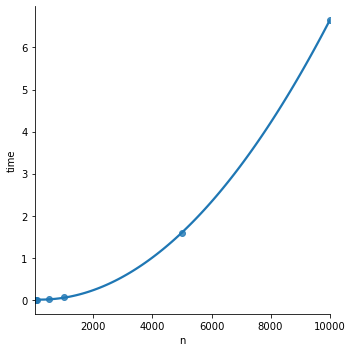

In [31]:
_ = sns.lmplot(x='n', y='time', data=poly_df, ci=None, order=2)

**In Big O notation**:

* Constant: O(1)
* Linear: O($n$)
* Polynomial: O($n^2$)

**Other common runtimes**:

* Logarithmic: O(log $n$)
* Exponential: O($2^n$)
* O($n$ log $n$)
* O($n!$)

**Return to slides here.**

## Segment 2: Lists and Dictionaries

### List-Based Data Structures

#### Lists

In [32]:
t = [25, 2, 5]
t

[25, 2, 5]

Lists in Python are **extensible** by default: 

In [33]:
t.append(26)
t

[25, 2, 5, 26]

In [34]:
t[2]

5

Cannot apply mathematical operators, e.g., try uncommenting: 

In [35]:
# t/2

**Return to slides here.**

#### Arrays

In [36]:
x = np.array([25, 2, 5])
x

array([25,  2,  5])

In [37]:
x[2]

5

In [38]:
x/2.

array([12.5,  1. ,  2.5])

In [39]:
y = torch.tensor([[25, 2, 5], [26, 1, 4]])
y

tensor([[25,  2,  5],
        [26,  1,  4]])

In [40]:
y[0, 2]

tensor(5)

In [41]:
y/2.

tensor([[12.5000,  1.0000,  2.5000],
        [13.0000,  0.5000,  2.0000]])

In [42]:
z = tf.Variable([[[0, 1], [2, 3]], [[25, 26], [7, 9]]], dtype=tf.float16)
z

<tf.Variable 'Variable:0' shape=(2, 2, 2) dtype=float16, numpy=
array([[[ 0.,  1.],
        [ 2.,  3.]],

       [[25., 26.],
        [ 7.,  9.]]], dtype=float16)>

In [43]:
z[1, 0, 0]

<tf.Tensor: shape=(), dtype=float16, numpy=25.0>

In [44]:
z/2.

<tf.Tensor: shape=(2, 2, 2), dtype=float16, numpy=
array([[[ 0. ,  0.5],
        [ 1. ,  1.5]],

       [[12.5, 13. ],
        [ 3.5,  4.5]]], dtype=float16)>

Arrays in Python are also typically extensible by default.

Note that it's very efficient (O(1)) to append items to end of list...

In [45]:
np.append(x, 26)

array([25,  2,  5, 26])

...but time inefficient to add at start or middle of long list as later items will need to be shifted to later in list. Worst case is insert at beginning of list, which has O($n$) complexity. 

Note that as well as appending, accessing an array element by index or finding the array's length are O(1).

**Return to slides here.**

#### Stacks

Can be implemented in Python with lists: 

In [46]:
s = []
s

[]

In [47]:
s.append('five_of_diamonds') # push
s

['five_of_diamonds']

In [48]:
s.append('queen_of_hearts')
s

['five_of_diamonds', 'queen_of_hearts']

In [49]:
s.append('ace_of_spades')
s

['five_of_diamonds', 'queen_of_hearts', 'ace_of_spades']

In [50]:
s.pop()

'ace_of_spades'

In [51]:
s

['five_of_diamonds', 'queen_of_hearts']

**Return to slides here.**

### Searching and Sorting

Topics in this section: 
* Binary search
* Bubble sort
* Merge sort
* Quick sort

#### Binary Search

Let's say we have an array, `b`: 

In [52]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])
b

array([ 25,   2,   5,  14,  22,  11,  96,   1, 101])

Under normal circumstances, the only way to search for a value (e.g., `25`) is to search element by element. In the worse-case, this has O($n$) time complexity (e.g., if we were to search `b` for `25` from its end).

If `b` already happens to be sorted, however...

In [53]:
b.sort() # FYI: uses quick sort
b

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

...we can use the **binary search** algorithm, which has O(log $n$) time complexity: 

* Start at the midpoint (`b` is nine elements long, so midpoint is 5th: `14`).
* Since `25` is larger than `14`, we need only search the top half of `b`...
* So we find the midpoint between the 5th element and the 9th, which is the 7th, and which happens to be `25`. 
* Done! And in only two steps instead of seven (if we were to search elementwise from first onward).
* If we were searching for `22`, then our next search would be halfway between 5th and 7th elements, which is 6th element and voilà!
* With our nine-element array, worst case is four steps (for `1` or `101`) to find any value (or determine value *isn't* in array).

(Note: called *binary* because at each step we either search upward or downward.)

Doubling $n$ results in only one extra step in worst case: 
* One step with array of length 1($= 2^0$)
* Two steps with length 2($= 2^1$) up to length 3
* Three steps with $n = 4 (= 2^2$) up to $n = 7$
* Four steps with $n = 8 (= 2^3$) up to $n = 15$
* Five steps with $n = 16 (= 2^4$) up to $n = 31$

Hence O(log $n$) where, as is typical in CS, we use $\text{log}_2$ (because of binary bits and frequently doubling/halving quantities). E.g.: 

In [54]:
np.log2(4) + 1

3.0

In [55]:
np.log2(8) + 1

4.0

In [56]:
np.log2(16) + 1

5.0

Recall that we retain only the dominant term, so O(log $n$ + 1) becomes O(log $n$).

Here's an implementation of binary search, for your reference, that *iterates* over binary search steps with a `while` loop: 

In [57]:
def binary_search(array, value):
    
    low = 0
    high = len(array)-1
    
    while low <= high:
        midpoint = (low + high) // 2 # rounds down to nearest integer after division
        if value < array[midpoint]:
            high = midpoint-1
        elif value > array[midpoint]:
            low = midpoint+1
        else:
            return midpoint
    return -1

In [58]:
binary_search(b, 25)

6

In [59]:
binary_search(b, 255)

-1

Alternatively, you could implement binary search with *recursion* instead of iteration: 

In [60]:
def recursive_binary_search(array, value, low, high):
    
    if low <= high:
        
        midpoint = (low + high) // 2
        
        if array[midpoint] == value:
            return midpoint
        elif array[midpoint] > value:
            return recursive_binary_search(array, value, low, midpoint-1)
        else:
            return recursive_binary_search(array, value, midpoint+1, high)
    else:
        return -1

In [61]:
recursive_binary_search(b, 25, 0, len(b)-1)

6

In [62]:
recursive_binary_search(b, 255, 0, len(b)-1)

-1

#### Bubble Sort

To sort (e.g., from smallest to largest value), the most naïve (and computationally complex) approach would be to compare a given element with all other elements.

A common naïve implementation is the **bubble sort**, which allows the largest values to gradually "bubble up" toward the "top" (typically the end) of the array:

In [63]:
def bubble_sort(array):
    
    n = len(array)
    
    for i in range(n-1):
        for j in range(0, n-1): # could be n-i-1 as, e.g., top value is guaranteed to have bubbled up in 1st iteration
            if array[j] > array[j+1]:
                array[j], array[j+1] = array[j+1], array[j]
                
    return array

In [64]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])
b

array([ 25,   2,   5,  14,  22,  11,  96,   1, 101])

In [65]:
bubble_sort(b)

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

* During each iteration, we make $n-1$ comparisons 
* A total of $n-1$ iterations need to be made

$$ (n-1)(n-1) = n^2 -2n + 1 $$

Since we drop all terms but the dominant one, this leaves us with polynomial O($n^2$) time complexity for the worst case and the average case. (For more clever implementations, best case is O($n$) because array would already be sorted.)

In contrast, as is typical in algos, there is a time- vs memory-complexity trade-off: Memory complexity is constant, O(1).

In [66]:
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [67]:
max(granular_list_lengths)

10000

In [68]:
random.sample(range(0, max(granular_list_lengths)), 5) # samples 5 integers w/o replacement from uniform distribution

[8691, 6163, 7496, 2755, 4141]

In [69]:
bubble_times = []

for l in granular_list_lengths[0:7]:
    lst = random.sample(range(0, max(granular_list_lengths)), l)
    
    tic = time.process_time()
    x = bubble_sort(lst)
    toc = time.process_time()
    
    bubble_times.append(toc-tic)

In [70]:
bubble_df = pd.DataFrame(list(zip(granular_list_lengths, bubble_times)), columns=['n', 'time'])
bubble_df

,n,time
0,10,0.000015
1,50,0.000206
2,100,0.000891
3,500,0.025584
4,1000,0.114298
5,5000,2.844312
6,10000,10.962839


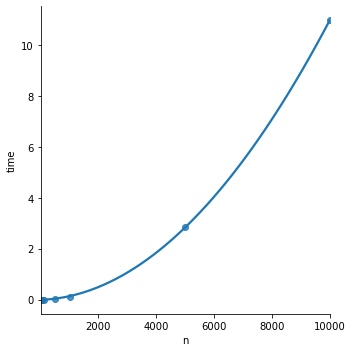

In [71]:
_ = sns.lmplot(x='n', y='time', data=bubble_df, ci=None, order=2)

#### Merge Sort

* General idea is to "divide and conquer"; specifically:
    1. Halve the array into smaller arrays
    2. Sort the smaller arrays
    3. Merge them back into full array
* The above steps are carried out recursively so ultimately sort arrays of max length 2, then merge back up to full length.

In [72]:
def merge_sort(my_list): # using list instead of array so we can .pop() (np arrays don't pop with built-in method)
    
    if len(my_list) > 1: # if length is 1, no need to sort (at deepest recursion, some will have len 1, others len 2)
        
        # 1. Halve: 
        midpoint = len(my_list) // 2 # Note: This is ~O(log n) behavior
        left_half = my_list[:midpoint]
        right_half = my_list[midpoint:]
        
        # 2. Sort (recursively):
        left_half = merge_sort(left_half)
        right_half = merge_sort(right_half)
        
        my_list = []
        
        # 3. Merge: 
        while len(left_half)>0 and len(right_half)>0: # Note: This inner loop exhibits ~O(n) behavior
            
            if left_half[0] < right_half[0]:
                my_list.append(left_half.pop(0)) # pop first element
            
            else: # 1st element of right half < 1st element of left
                my_list.append(right_half.pop(0))
                
        # If any elements remain from either half, they must be the largest value:
        for i in left_half:
            my_list.append(i)
        for i in right_half:
            my_list.append(i)
    
    return my_list

In [73]:
m = [25, 2, 5, 14, 22, 11, 96, 1, 101]

In [74]:
merge_sort(m)

[1, 2, 5, 11, 14, 22, 25, 96, 101]

Because of the O($n$) loop performing comparisons inside of the function halving list sizes (which we'll need to call O(log $n$) times), merge sort time complexity is the product, i.e., O($n$ log $n$).

In [75]:
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [76]:
ext_granular_lengths = granular_list_lengths + [50000, 100000] # extended
ext_granular_lengths

[10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

In [77]:
merge_times = []

for l in ext_granular_lengths:
    lst = random.sample(range(0, max(ext_granular_lengths)), l)
    
    tic = time.process_time()
    x = merge_sort(lst)
    toc = time.process_time()
    
    merge_times.append(toc-tic)

In [78]:
merge_df = pd.DataFrame(list(zip(ext_granular_lengths, merge_times)), columns=['n', 'time'])
merge_df

,n,time
0,10,0.000101
1,50,0.000147
2,100,0.000249
3,500,0.002283
4,1000,0.003478
5,5000,0.021839
6,10000,0.050212
7,50000,0.401968
8,100000,1.323631


On local laptop, $n=10000$ took ~0.05s with bubble sort compared to ~10.5s with merge sort: a ~200x speedup.

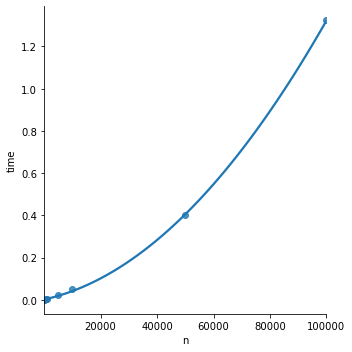

In [79]:
_ = sns.lmplot(x='n', y='time', data=merge_df, ci=None, order=2)

In contrast, while memory complexity for bubble sort was O(1) because we were sorting "in place" (not storing any values in memory), memory complexity is O($n$) for merge sort. 

(We need at least two array copies (2$n$) for the most space-efficient merge sort implementations, but we drop constants so this becomes O($n$). Our recursive merge sort implementation would require more as it stores several copies in memory; one more copy of size $n$ would be used for every time the array length doubles (log $n$) resulting in O($n$ log $n$) memory complexity.)

#### Quick Sort

Under many common conditions, the aptly-named **quick sort** is at least as time-efficient as merge sort while also being more space-efficient.

Like merge sort, quick sort uses the "divide and conquer" principle:
1. Pick a *pivot* point (often the final element, though it could be any element, e.g., first, random, median)
2. Move pivot within array such that all elements above pivot are larger (though randomly ordered) and all elements below pivot are smaller (though likewise randomly ordered)
    * Movement occurs element-by-element (and "in place", thus retaining O(1) memory complexity)
3. Recursively, perform quick sort both below and above pivot

In [80]:
def quick_sort(array):
    _quick_sort(array, 0, len(array)-1) # to start, low is index of first element in array; high is penultimate
    return array

In [81]:
def _quick_sort(array, low, high): 
    
    if low < high: # when low reaches high, we know all elements in array must be in order
        
        # Result of 2.: Element at "partitioning index" has been pivoted to its correct position
        p_index = partition(array, low, high) 
        
        # 3. Recursively sort the elements below the partitioning index...
        _quick_sort(array, low, p_index-1)
        # ...and, separately, above the partitioning index: 
        _quick_sort(array, p_index+1, high)
        
    return array

In [82]:
def partition(array, low, high):
    
    # 1. Use the final element as the pivot:
    pivot = array[high]
    
    i = (low-1) # index of element on small side
    for j in range(low, high): # like a bubble swap, we compare pivot to all elements between low and high
        if array[j] < pivot: # if value < pivot, it's correctly on left so increment the smaller element's index...
            i = i+1
            array[i], array[j] = array[j], array[i] 
    array[i+1], array[high] = array[high], array[i+1] # ...otherwise, swap greater value to right of pivot (now what we want)
    return(i+1) # return index of correctly positioned pivot

In [83]:
b = np.array([25, 2, 5, 14, 22, 11, 96, 1, 101])

In [84]:
quick_sort(b)

array([  1,   2,   5,  11,  14,  22,  25,  96, 101])

In [85]:
list_lengths

[10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [86]:
list_lengths[:6]

[10, 100, 1000, 10000, 100000, 1000000]

In [87]:
quick_times = []

for l in list_lengths[:6]:
    lst = random.sample(range(0, max(list_lengths[:6])), l)
    
    tic = time.process_time()
    x = quick_sort(lst)
    toc = time.process_time()
    
    quick_times.append(toc-tic)

In [88]:
quick_df = pd.DataFrame(list(zip(list_lengths[:6], quick_times)), columns=['n', 'time'])
quick_df

,n,time
0,10,0.000922
1,100,0.000091
2,1000,0.001494
3,10000,0.021906
4,100000,0.257312
5,1000000,3.199427


At $n=$ 10k, about a 2x speed-up relative to merge sort (so ~400 relative to bubble sort).

At $n=$ 100k, about a 5x speed-up relative to merge sort.

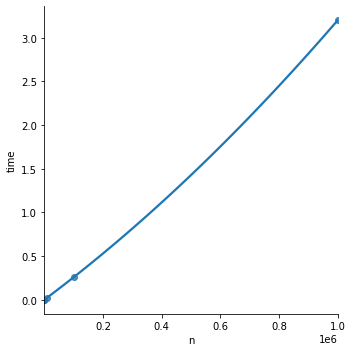

In [89]:
_ = sns.lmplot(x='n', y='time', data=quick_df, ci=None, order=2)

**Average-case time**: The efficiency of quick sort comes from moving lower-valued pivots toward the front (ideally to the midpoint) of the array then "dividing and conquering" on either side of the pivot. In which case (the average case), quick sort behaves like a merge sort (thereby it has O($n$ log $n$) time complexity), but in a manner that requires only a single copy of the array in memory.

**Worst-case time**: With the pivot starting at the final element, if the array is already sorted, this is the worst case. There will be as many calls to `quick_sort()` as there are elements in the array (i.e., $n$ calls) and quick sort will perform a full round of bubble sorting (as per the `for j in range` loop) during each of those (i.e., $n-1$ comparisons); the product of these resulting in O($n^2$) time complexity. So, don't use quick sort if the array is nearly in order! 

**Best-case time**: If all values in the array are equal, quick sort will scan over them all once to confirm this, in which case it has O($n$) time complexity. The more values that are equal in the array, the closer to O($n$) performance will be.

Those are the most frequently covered sorting algos. They're relatively straightforward to implement and illustrate time/space complexity trade-offs clearly. There are, however, many more ways to sort, with pros and cons related to time/space complexity as well as implementation difficulty. See the [Big O Cheat Sheet here](https://www.bigocheatsheet.com).

**Return to slides here.**

### Set-Based Data Structures: Maps/Dictionaries

In [90]:
inventory = {}
inventory

{}

In [91]:
inventory['hammer'] = [17]
inventory

{'hammer': [17]}

In [92]:
inventory['nail'] = [2552]
inventory['unicorn'] = [2]
inventory['dolphin'] = ['none']

In [93]:
inventory

{'hammer': [17], 'nail': [2552], 'unicorn': [2], 'dolphin': ['none']}

In [94]:
inventory['dolphin'] = [0]
inventory

{'hammer': [17], 'nail': [2552], 'unicorn': [2], 'dolphin': [0]}

In [95]:
inventory['unicorn'].append(3)
inventory

{'hammer': [17], 'nail': [2552], 'unicorn': [2, 3], 'dolphin': [0]}

**Return to slides here.**

### Hashing

Let's say we have some value: 

In [96]:
value = 5551234567 # a phone number from any American '90s sitcom

A common hash function approach is to use the modulo operator on the last few digits of the value...

In [97]:
split_value = [digit for digit in str(value)]
split_value

['5', '5', '5', '1', '2', '3', '4', '5', '6', '7']

In [98]:
final_digits = int(''.join(split_value[-2:])) # final digits typically used b/c they tend to vary more than first ones
final_digits

67

In [99]:
hash_value = final_digits % 10 # 10 is arbitrary, but would be used consistently across values to be hashed
hash_value

7

In [100]:
def simple_hash(v):
    split_v = [digit for digit in str(v)]
    final_2 = int(''.join(split_v[-2:]))
    return final_2 % 10

In [101]:
simple_hash(value)

7

In [102]:
simple_hash(5557654321)

1

These hash values (`7` and `1`) could be used in a sequential, small-integer index, i.e., a *hash table*.

#### Collisions

Major problem with the `simple_hash()` function:
* The hash table has at most ten indices 
* Ergo, many input values will result in **collisions**, e.g.:

In [103]:
simple_hash(555)

5

In [104]:
simple_hash(125)

5

Three common ways to resolve collisions:
1. Change the modulus denominator (e.g., `10` --> `11`); this adds procedural (and thus time) complexity to hash algo
2. Change the hash function entirely; ditto w.r.t. procedural complexity
3. Store a list (or similar) at the index, e.g.:

In [105]:
hash_table = {}

In [106]:
hash_table[simple_hash(555)] = [555]
hash_table

{5: [555]}

In [107]:
hash_table[simple_hash(125)].append(125)
hash_table

{5: [555, 125]}

Such a list is called a **bucket**. 

Worst case:
* All of the values hash to the same hash value (e.g., `5`)
* Thus, all of the values are stored in a single bucket
* Searching through the bucket has linear O($n$) time complexity

Alternatively, we can increase memory complexity instead of time complexity: 
* Use very large modulus denominator
* Reduces probability of collisions
* If use denominator of `1e9`, we have a hash table with a billion buckets

Could also have a second half function *inside* of the bucket (e.g., if we know we'll have a few very large buckets).

There is no "perfect hash". It depends on the values you're working with. There are many options to consider with various trade-offs.

**Load Factor**

Metric that guides hashing decisions:
$$ \text{load factor} = \frac{n_\text{values}}{n_\text{buckets}} $$

In [108]:
10/1e9

1e-08

If we have ten values to store, but a billion buckets...
$$ \text{load factor} = \frac{10}{10^9} = 10^{-8}$$

...we are probably using much more memory than we need to. This is the case whenever load factor $\approx 0$.

On the other hand, if the load factor is approaching one, $n_\text{values} \approx n_\text{buckets}$ and we may want to consider a larger hash table.

If load factor $>1$, then collisions are guaranteed and the case for a larger hash table is even stronger.

#### Hash Maps

In all of the above examples, we were hashing "values", but these "values" could in fact be the *keys* of a key-value pair, allowing us to have a **hash map**.

Let's say `Jane Dough` has receipt number `5551234567`, where we're using the receipt numbers as keys to look up customers. 

We can add this as an entry in a hash table for quick lookup later (once we have many more receipts...):

In [109]:
hash_map = {}

In [110]:
hash_map[simple_hash(5551234567)] = (5551234567, 'Jane Dough')
hash_map

{7: (5551234567, 'Jane Dough')}

In [111]:
hash_map[simple_hash(5551234568)] = (5551234568, 'Johnny Dochevski')
hash_map

{7: (5551234567, 'Jane Dough'), 8: (5551234568, 'Johnny Dochevski')}

**FYI**: In Python, dictionaries are hash maps.

#### String Keys

If our keys are character strings, we can still make use of hashing by converting the character string into an integer.

For example, we could use the [ASCII table](http://www.asciitable.com) to convert `Jon` to `112157156`.

**Return to slides here.**

### Decision Trees

In [112]:
titanic = sns.load_dataset('titanic')

In [113]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [114]:
np.unique(titanic['survived'], return_counts=True)

(array([0, 1]), array([549, 342]))

In [115]:
np.unique(titanic['sex'], return_counts=True)

(array(['female', 'male'], dtype=object), array([314, 577]))

In [116]:
np.unique(titanic['class'], return_counts=True)

(array(['First', 'Second', 'Third'], dtype=object), array([216, 184, 491]))

In [117]:
gender = pd.get_dummies(titanic['sex'])
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [118]:
clas = pd.get_dummies(titanic['class'])
clas

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [119]:
y = titanic.survived

In [120]:
X = pd.concat([clas.First, clas.Second, gender.female], axis=1)
X

,First,Second,female
0,0,0,0
1,1,0,1
2,0,0,1
3,1,0,1
4,0,0,0
...,...,...,...
886,0,1,0
887,1,0,1
888,0,0,1
889,1,0,0


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [123]:
X_train.shape

(596, 3)

In [124]:
y_train.shape

(596,)

In [125]:
X_test.shape

(295, 3)

In [126]:
y_test.shape

(295,)

In [127]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [128]:
dt_model = DecisionTreeClassifier()

In [129]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(186.0, 190.26, 'X[2] <= 0.5\ngini = 0.467\nsamples = 596\nvalue = [374, 222]'),
 Text(111.60000000000001, 135.9, 'X[0] <= 0.5\ngini = 0.304\nsamples = 390\nvalue = [317, 73]'),
 Text(74.4, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.263\nsamples = 314\nvalue = [265, 49]'),
 Text(37.2, 27.180000000000007, 'gini = 0.252\nsamples = 237\nvalue = [202, 35]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.298\nsamples = 77\nvalue = [63, 14]'),
 Text(148.8, 81.53999999999999, 'gini = 0.432\nsamples = 76\nvalue = [52, 24]'),
 Text(260.40000000000003, 135.9, 'X[0] <= 0.5\ngini = 0.4\nsamples = 206\nvalue = [57, 149]'),
 Text(223.20000000000002, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.465\nsamples = 147\nvalue = [54, 93]'),
 Text(186.0, 27.180000000000007, 'gini = 0.498\nsamples = 99\nvalue = [53, 46]'),
 Text(260.40000000000003, 27.180000000000007, 'gini = 0.041\nsamples = 48\nvalue = [1, 47]'),
 Text(297.6, 81.53999999999999, 'gini = 0.097\nsamples = 59\nvalue = [3, 56]')]

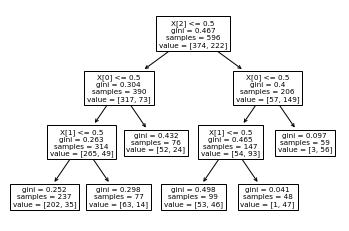

In [130]:
plot_tree(dt_model) # can read about Gini here: en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity

In [131]:
rose = np.array([[1, 0, 1]]) # must be matrix format
jack = np.array([[0, 0, 0]])

In [132]:
dt_model.predict(rose)

array([1])

In [133]:
dt_model.predict(jack)

array([0])

In [134]:
dt_yhat = dt_model.predict(X_test) # decision trees are prone to overfitting training data

In [135]:
dt_yhat[0:6]

array([0, 0, 0, 1, 0, 1])

In [136]:
y_test[0:6]

709    1
439    0
840    0
720    1
39     1
290    1
Name: survived, dtype: int64

In [137]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [138]:
accuracy_score(dt_yhat, y_test)

0.7728813559322034

In [139]:
roc_auc_score(dt_yhat, y_test)

0.826696770662288

**Exercises**:

1. Create more features ([here are some ideas for creating them](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)) with an eye to improving model fit on the test data. 

2. Re-train the decision tree on the training data and evaluate its accuracy and ROC AUC on the test data. How does the tree compare with an ordinary-least-squares regression model (from [*Intro to Stats*](http://localhost:8888/notebooks/work/notebooks/6-statistics.ipynb)) trained on the same data?

**Return to slides here.**

### Random Forests

In [140]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


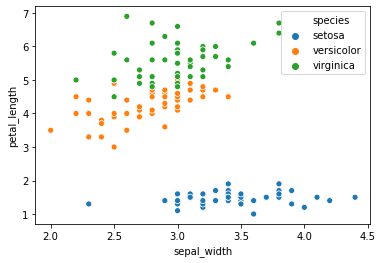

In [143]:
_ = sns.scatterplot(x='sepal_width', y='petal_length', hue='species', data=iris)

In [145]:
X = iris[['sepal_width', 'petal_length']]

In [146]:
y = iris.species

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [156]:
iris_dt = DecisionTreeClassifier().fit(X_train, y_train)

In [157]:
iris_dt_yhat = iris_dt.predict(X_test)

In [158]:
accuracy_score(iris_dt_yhat, y_test) # ROC AUC is for binary classifier

0.9

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf_model = RandomForestClassifier(n_estimators=100) # n decision trees in forest

In [162]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
rf_yhat = rf_model.predict(X_test)

In [164]:
accuracy_score(rf_yhat, y_test)

0.96

**Return to slides.**

### Gradient-Boosted Trees

In [165]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [166]:
import xgboost as xgb

XGBoost `DMatrix()` method requires numeric inputs, not strings: 

In [188]:
y_train[0:6]

96     versicolor
105     virginica
66     versicolor
0          setosa
122     virginica
67     versicolor
Name: species, dtype: object

In [189]:
y_train_int = y_train.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
y_test_int = y_test.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])

In [191]:
y_train_int[0:6]

96     1
105    2
66     1
0      0
122    2
67     1
Name: species, dtype: int64

In [187]:
D_train = xgb.DMatrix(X_train, label=y_train_int)
D_test = xgb.DMatrix(X_test, label=y_test_int)

In [192]:
param = {
    'eta': 0.1, # learning rate (0.1 to 0.3 are common)
    'max_depth': 3,
    'objective': 'multi:softprob',
    'num_class': 3
}
steps = 10

In [193]:
xg_model = xgb.train(param, D_train, steps)

In [194]:
xg_yhats = xg_model.predict(D_test)

In [195]:
xg_yhats[0] # supports >2 classes

array([0.1464159 , 0.6788071 , 0.17477708], dtype=float32)

In [196]:
xg_yhat = np.asarray([np.argmax(line) for line in xg_yhats])

In [197]:
xg_yhat[0]

1

In [199]:
accuracy_score(xg_yhat, y_test_int)

0.96